# Key Performance Indicators

In [148]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', None)
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from scipy.stats import zscore
from collections import defaultdict
import pytz


In [187]:
df_ev = pd.read_csv("data/cleaned_chargingdata.csv")
df_weather = pd.read_csv("data/cleaned_weather_data.csv")

In [188]:
df_ev.dtypes

Unnamed: 0.1          int64
Unnamed: 0            int64
id                   object
connectionTime       object
disconnectTime       object
doneChargingTime     object
kWhDelivered        float64
sessionID            object
siteID                int64
spaceID              object
stationID            object
timezone             object
userID              float64
chargingDuration    float64
dtype: object

In [189]:
print(df_ev.isna().sum())

Unnamed: 0.1            0
Unnamed: 0              0
id                      0
connectionTime          0
disconnectTime          0
doneChargingTime        0
kWhDelivered            0
sessionID               0
siteID                  0
spaceID                 0
stationID               0
timezone                0
userID              17187
chargingDuration        0
dtype: int64


In [190]:
df_ev['id'] = df_ev['id'].astype('string')

df_ev['connectionTime'] = pd.to_datetime(df_ev['connectionTime'], errors='coerce', utc=True)  
df_ev['disconnectTime'] = pd.to_datetime(df_ev['disconnectTime'], errors='coerce', utc=True)  
df_ev['doneChargingTime'] = pd.to_datetime(df_ev['doneChargingTime'], errors='coerce', utc=True) 

df_ev['connectionTime'] = df_ev['connectionTime'].dt.tz_convert('America/Los_Angeles')
df_ev['disconnectTime'] = df_ev['disconnectTime'].dt.tz_convert('America/Los_Angeles')
df_ev['doneChargingTime'] = df_ev['doneChargingTime'].dt.tz_convert('America/Los_Angeles')

# df_ev['connectionTime'] = df_ev['connectionTime'].str.replace(r'(-08:00)|(-07:00)', '', regex=True)
# df_ev['disconnectTime'] = df_ev['disconnectTime'].str.replace(r'(-08:00)|(-07:00)', '', regex=True)
# df_ev['doneChargingTime'] = df_ev['doneChargingTime'].str.replace(r'(-08:00)|(-07:00)', '', regex=True)


In [191]:
df_ev.dtypes

Unnamed: 0.1                                      int64
Unnamed: 0                                        int64
id                                       string[python]
connectionTime      datetime64[ns, America/Los_Angeles]
disconnectTime      datetime64[ns, America/Los_Angeles]
doneChargingTime    datetime64[ns, America/Los_Angeles]
kWhDelivered                                    float64
sessionID                                        object
siteID                                            int64
spaceID                                          object
stationID                                        object
timezone                                         object
userID                                          float64
chargingDuration                                float64
dtype: object

In [11]:
df_ev

,Unnamed: 0.1,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,chargingDuration
0,0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 05:08:54-08:00,2020-01-02 11:11:15-08:00,2020-01-02 09:31:35-08:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,262.683333
1,1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 05:36:50-08:00,2020-01-02 14:38:21-08:00,2020-01-02 12:18:05-08:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,401.250000
2,2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 05:56:35-08:00,2020-01-02 16:39:22-08:00,2020-01-02 08:35:06-08:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,158.516667
3,3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 05:59:58-08:00,2020-01-02 08:38:39-08:00,2020-01-02 07:18:45-08:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,78.783333
4,4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 06:00:01-08:00,2020-01-02 14:08:40-08:00,2020-01-02 10:17:30-08:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,257.483333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64987,65032,8670,5d2fbdd3f9af8b4d0dd0d54a,2019-07-01 14:49:12-07:00,2019-07-01 18:37:18-07:00,2019-07-01 16:14:33-07:00,8.399,1_1_179_798_2019-07-01 21:49:11.873404,1,AG-3F18,1-1-179-798,America/Los_Angeles,1346.0,85.350000
64988,65033,8671,5d2fbdd3f9af8b4d0dd0d54b,2019-07-01 14:58:45-07:00,2019-07-01 17:39:48-07:00,2019-07-01 17:39:48-07:00,16.864,1_1_179_794_2019-07-01 21:58:44.571011,1,AG-3F20,1-1-179-794,America/Los_Angeles,364.0,161.050000
64989,65034,8672,5d2fbdd3f9af8b4d0dd0d54c,2019-07-01 15:02:21-07:00,2019-07-01 17:58:50-07:00,2019-07-01 17:58:50-07:00,18.335,1_1_191_807_2019-07-01 22:02:20.810735,1,AG-4F47,1-1-191-807,America/Los_Angeles,2050.0,176.483333
64990,65035,8673,5d2fbdd3f9af8b4d0dd0d54d,2019-07-01 15:23:44-07:00,2019-07-01 19:03:36-07:00,2019-07-01 19:03:36-07:00,22.815,1_1_179_781_2019-07-01 22:23:32.496137,1,AG-3F31,1-1-179-781,America/Los_Angeles,1626.0,219.866667


In [67]:
site1 = df_ev[df_ev.siteID == 1]
site1.spaceID.unique()

array(['AG-3F30', 'AG-1F01', 'AG-1F03', 'AG-1F04', 'AG-1F06', 'AG-1F13',
       'AG-1F09', 'AG-4F34', 'AG-1F11', 'AG-1F08', 'AG-3F22', 'AG-1F14',
       'AG-1F07', 'AG-1F12', 'AG-3F29', 'AG-1F05', 'AG-3F18', 'AG-1F10',
       'AG-3F16', 'AG-4F37', 'AG-1F02', 'AG-3F28', 'AG-3F25', 'AG-3F24',
       'AG-3F33', 'AG-3F23', 'AG-3F31', 'AG-3F32', 'AG-3F27', 'AG-3F26',
       'AG-3F20', 'AG-3F17', 'AG-3F21', 'AG-3F19', 'AG-4F44', 'AG-4F52',
       'AG-4F41', 'AG-4F48', 'AG-4F35', 'AG-4F50', 'AG-3F15', 'AG-4F51',
       'AG-4F47', 'AG-4F46', 'AG-4F49', 'AG-4F43', 'AG-4F42', 'AG-4F45',
       'AG-4F36', 'AG-4F38', 'AG-4F40', 'AG-4F39'], dtype=object)

In [68]:
site2 = df_ev[df_ev.siteID == 2]
site2.spaceID.unique()

array(['CA-512', 'CA-327', 'CA-326', 'CA-303', 'CA-325', 'CA-311',
       'CA-309', 'CA-491', 'CA-493', 'CA-499', 'CA-323', 'CA-313',
       'CA-324', 'CA-513', 'CA-305', 'CA-317', 'CA-510', 'CA-315',
       'CA-321', 'CA-490', 'CA-497', 'CA-489', 'CA-319', 'CA-492',
       'CA-494', 'CA-502', 'CA-500', 'CA-495', 'CA-498', 'CA-304',
       'CA-307', 'CA-306', 'CA-501', 'CA-318', 'CA-308', 'CA-316',
       'CA-312', 'CA-320', 'CA-212', 'CA-508', 'CA-322', 'CA-314',
       'CA-503', 'CA-504', 'CA-496', 'CA-310', 'CA-506', 'CA-149',
       'CA-509', 'CA-507', 'CA-511', 'CA-213', 'CA-505', 'CA-148',
       '11900388'], dtype=object)

## 1. Hourly Utilization Rate

In [192]:
# Define the total number of spaces per site (example values)
total_spaces = {
    1: 52,  # Replace with the actual number of spaces for site 1
    2: 54   # Replace with the actual number of spaces for site 2
}

# Create a new df_evFrame to hold hourly df_ev
start_time = df_ev['connectionTime'].min().replace(minute=0, second=0, microsecond=0)
end_time = df_ev['disconnectTime'].max().replace(minute=0, second=0, microsecond=0) + timedelta(hours=1)

# Generate hourly intervals
times = pd.date_range(start=start_time, end=end_time, freq='H')
hourly_df_ev = []

for time in times:
    # For each hour, calculate utilization for each site
    hourly_entry = {'hour': time}
    for site in total_spaces.keys():
        # Filter sessions active during the hour for the site
        active_sessions = df_ev[(df_ev['siteID'] == site) &
                             (df_ev['connectionTime'] <= time + timedelta(hours=1)) &
                             (df_ev['disconnectTime'] > time)]

        # Calculate utilization rate
        utilization = len(active_sessions['spaceID'].unique()) / total_spaces[site]
        hourly_entry[f'utilization_{site}'] = utilization

    hourly_df_ev.append(hourly_entry)

# Create df_evFrame for hourly utilization
hourly_df = pd.DataFrame(hourly_df_ev)

# Display the result
hourly_df.head()

,hour,utilization_1,utilization_2
0,2018-04-25 04:00:00-07:00,0.0,0.018519
1,2018-04-25 05:00:00-07:00,0.0,0.018519
2,2018-04-25 06:00:00-07:00,0.0,0.055556
3,2018-04-25 07:00:00-07:00,0.0,0.129630
4,2018-04-25 08:00:00-07:00,0.0,0.407407


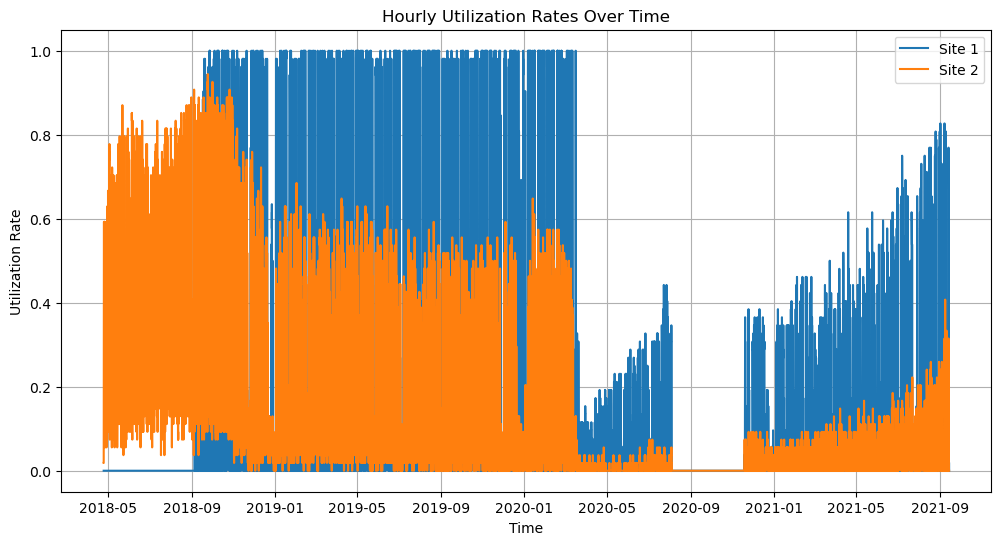

In [193]:
plt.figure(figsize=(12, 6))
for site in total_spaces.keys():
    plt.plot(hourly_df['hour'], hourly_df[f'utilization_{site}'], label=f'Site {site}')

plt.title('Hourly Utilization Rates Over Time')
plt.xlabel('Time')
plt.ylabel('Utilization Rate')
plt.legend()
plt.grid()
plt.show()

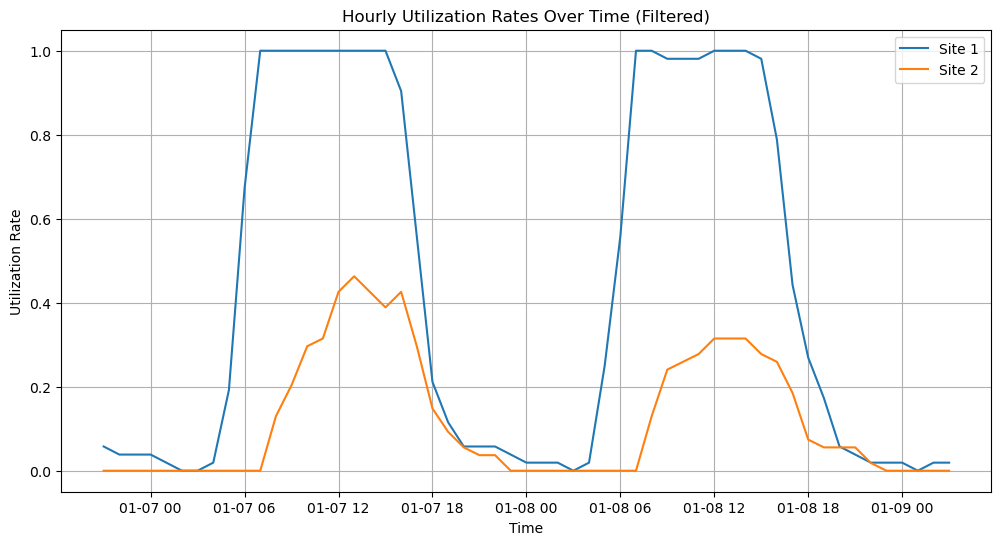

In [194]:

# Filter the timeframe
timezone = pytz.timezone('America/Los_Angeles')
filtered_start_time = datetime(2020, 1, 7, 6, 0).astimezone(timezone)  # Example start time
filtered_end_time = datetime(2020, 1, 9, 12, 0).astimezone(timezone)  # Example end time
filtered_df = hourly_df[(hourly_df['hour'] >= filtered_start_time) & (hourly_df['hour'] <= filtered_end_time)]

# Visualization
plt.figure(figsize=(12, 6))
for site in total_spaces.keys():
    plt.plot(filtered_df['hour'], filtered_df[f'utilization_{site}'], label=f'Site {site}')

plt.title('Hourly Utilization Rates Over Time (Filtered)')
plt.xlabel('Time')
plt.ylabel('Utilization Rate')
plt.legend()
plt.grid()
plt.show()

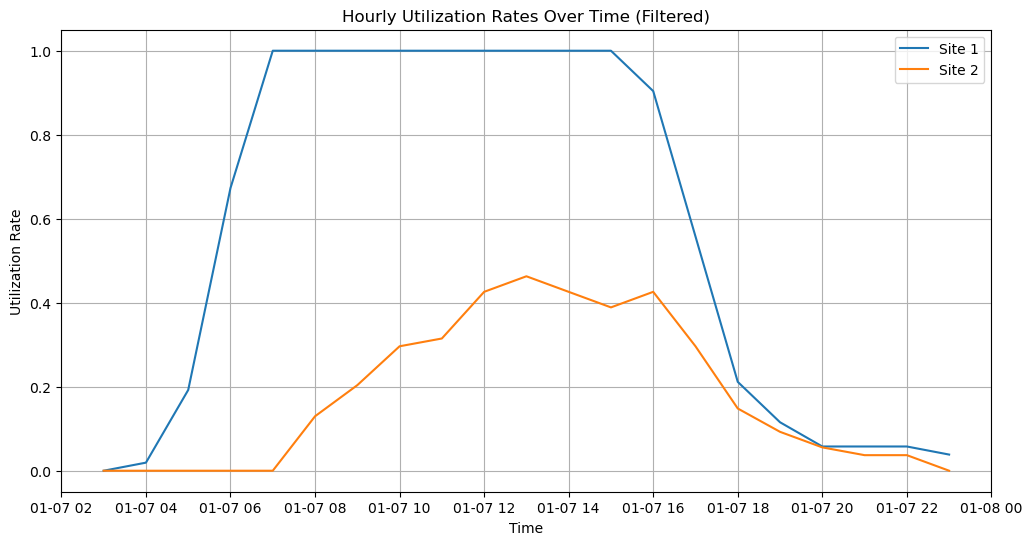

In [195]:
timezone = pytz.timezone('America/Los_Angeles')
filtered_start_time = datetime(2020, 1, 7, 12, 0).astimezone(timezone)  # Example start time
filtered_end_time = datetime(2020, 1, 8, 8, 0).astimezone(timezone)  # Example end time
filtered_df = hourly_df[(hourly_df['hour'] >= filtered_start_time) & (hourly_df['hour'] <= filtered_end_time)]

# Visualization
plt.figure(figsize=(12, 6))
for site in total_spaces.keys():
    plt.plot(filtered_df['hour'], filtered_df[f'utilization_{site}'], label=f'Site {site}')

plt.title('Hourly Utilization Rates Over Time (Filtered)')
plt.xlabel('Time')
plt.ylabel('Utilization Rate')
plt.legend()
plt.grid()
plt.show()

# 2. Average Hourly Charging Session Duration

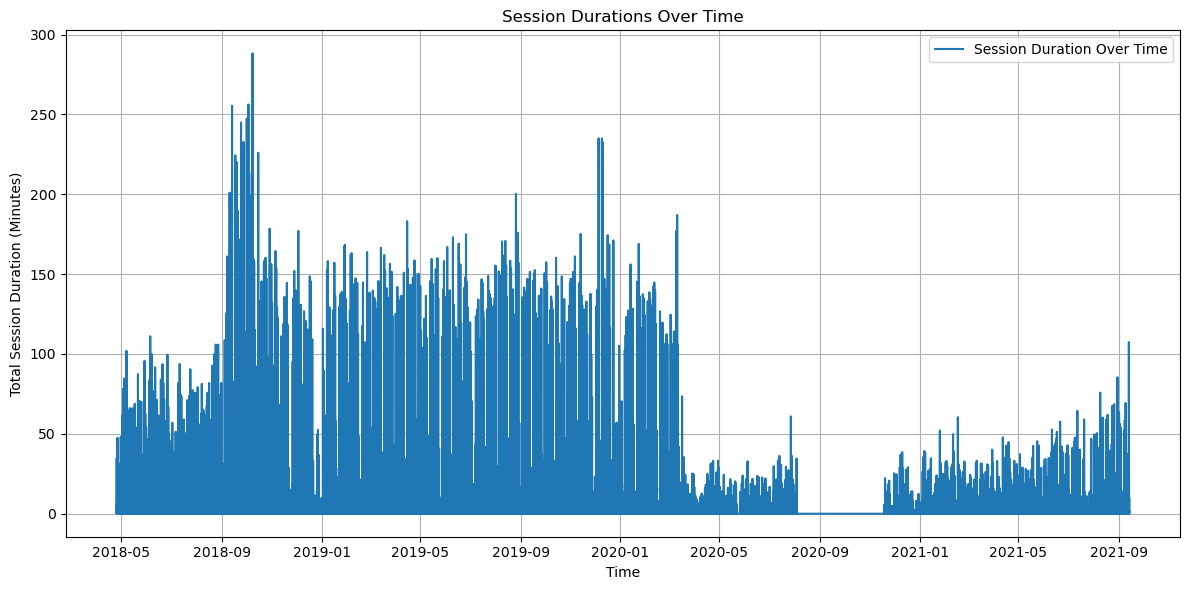

In [196]:
df_ev['sessionDuration'] = (df_ev['disconnectTime'] - df_ev['connectionTime']).dt.total_seconds() / 3600
df_ev['chargingDuration'] = (df_ev['doneChargingTime'] - df_ev['connectionTime']).dt.total_seconds() / 3600

session_duration_over_time = df_ev.resample('H', on='connectionTime')['chargingDuration'].sum().reset_index()


plt.figure(figsize=(12, 6))
plt.plot(
    session_duration_over_time['connectionTime'], 
    session_duration_over_time['chargingDuration'], 
    label='Session Duration Over Time', 
)
plt.title('Session Durations Over Time')
plt.xlabel('Time')
plt.ylabel('Total Session Duration (Minutes)')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


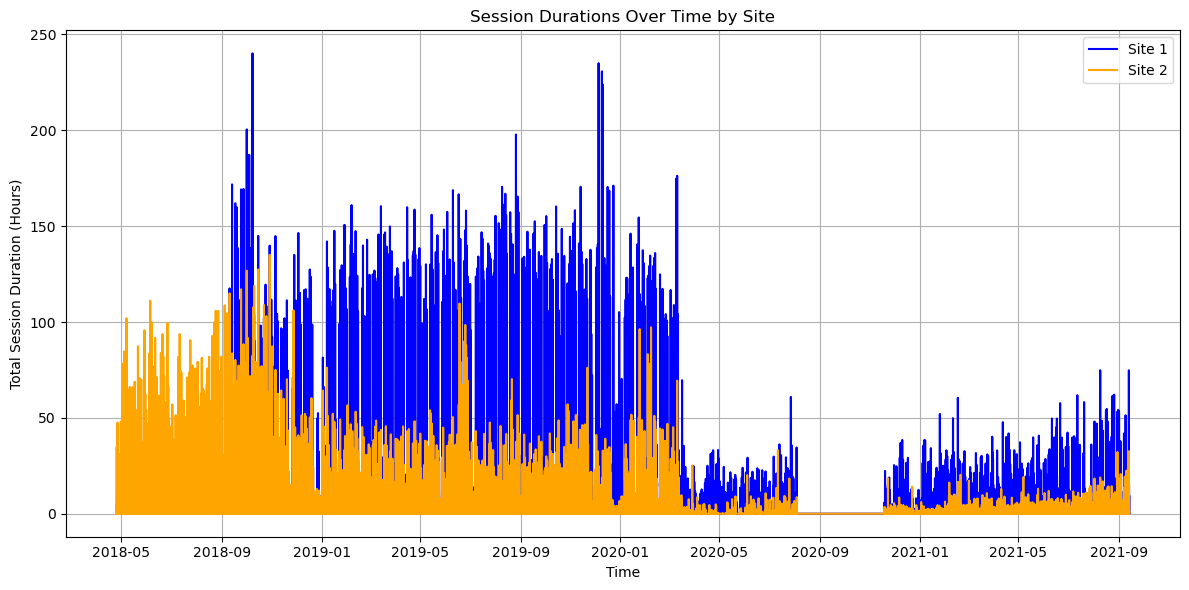

In [197]:

# Filter data for Site 1
df_ev_site1 = df_ev[df_ev['siteID'] == 1]
session_duration_site1 = df_ev_site1.resample('H', on='connectionTime')['chargingDuration'].sum().reset_index()

# Filter data for Site 2
df_ev_site2 = df_ev[df_ev['siteID'] == 2]
session_duration_site2 = df_ev_site2.resample('H', on='connectionTime')['chargingDuration'].sum().reset_index()

# Plot session durations over time for both sites
plt.figure(figsize=(12, 6))
plt.plot(
    session_duration_site1['connectionTime'], 
    session_duration_site1['chargingDuration'], 
    label='Site 1', 
    color='blue'
)
plt.plot(
    session_duration_site2['connectionTime'], 
    session_duration_site2['chargingDuration'], 
    label='Site 2', 
    color='orange'
)
plt.title('Session Durations Over Time by Site')
plt.xlabel('Time')
plt.ylabel('Total Session Duration (Hours)')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


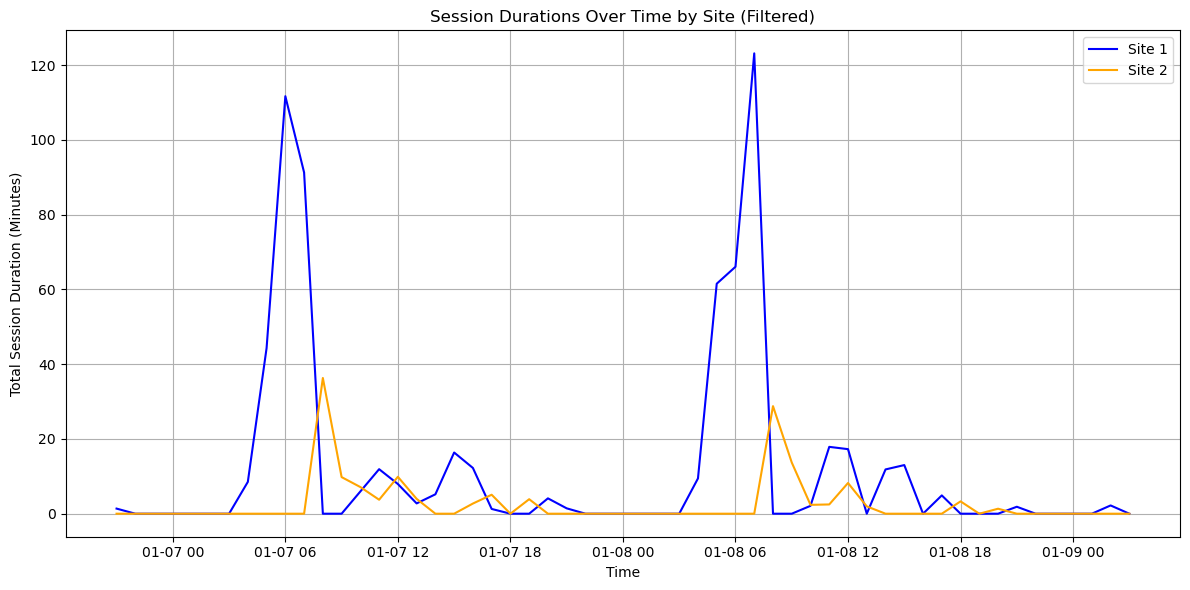

In [198]:
# Define the timezone
timezone = pytz.timezone('America/Los_Angeles')

# Define the filtered time range
filtered_start_time = datetime(2020, 1, 7, 6, 0).astimezone(timezone)  # Example start time
filtered_end_time = datetime(2020, 1, 9, 12, 0).astimezone(timezone)  # Example end time

# Filter the DataFrame based on the timeframe
filtered_session_duration_site1 = session_duration_site1[
    (session_duration_site1['connectionTime'] >= filtered_start_time) & 
    (session_duration_site1['connectionTime'] <= filtered_end_time)
]

filtered_session_duration_site2 = session_duration_site2[
    (session_duration_site2['connectionTime'] >= filtered_start_time) & 
    (session_duration_site2['connectionTime'] <= filtered_end_time)
]

# Plot session durations over time for both sites within the filtered timeframe
plt.figure(figsize=(12, 6))
plt.plot(
    filtered_session_duration_site1['connectionTime'], 
    filtered_session_duration_site1['chargingDuration'] ,  
    label='Site 1', 
    color='blue'
)
plt.plot(
    filtered_session_duration_site2['connectionTime'], 
    filtered_session_duration_site2['chargingDuration'],  
    label='Site 2', 
    color='orange'
)
plt.title('Session Durations Over Time by Site (Filtered)')
plt.xlabel('Time')
plt.ylabel('Total Session Duration (Minutes)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

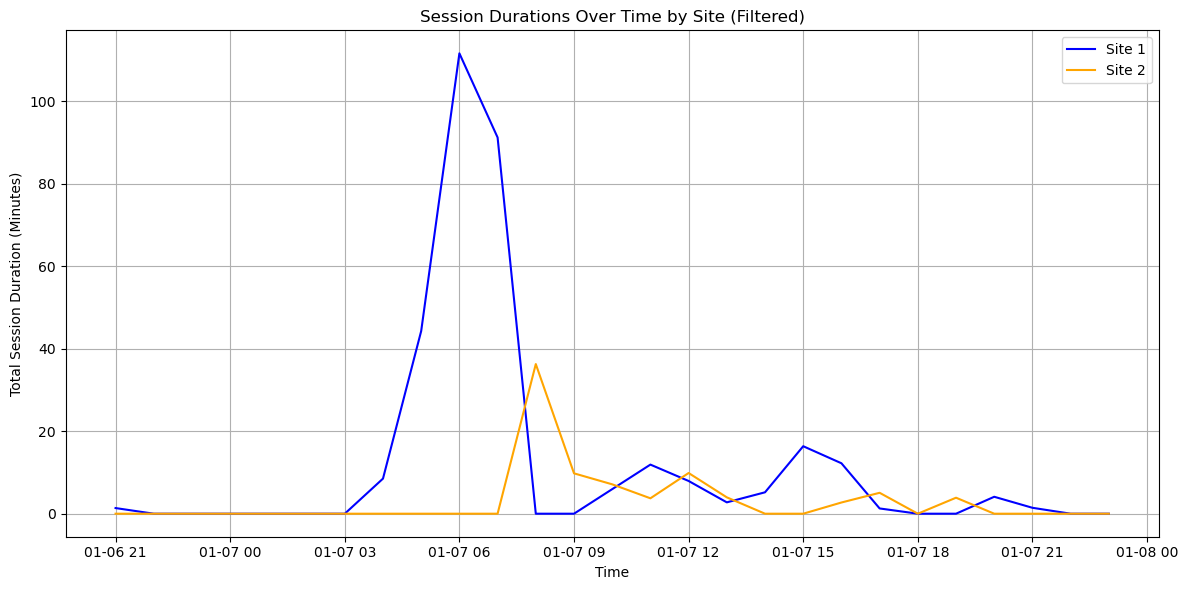

In [199]:
filtered_start_time = datetime(2020, 1, 7, 6, 0).astimezone(timezone)  # Example start time
filtered_end_time = datetime(2020, 1, 8, 8, 0).astimezone(timezone)  # Example end time

filtered_session_duration_site1 = session_duration_site1[
    (session_duration_site1['connectionTime'] >= filtered_start_time) & 
    (session_duration_site1['connectionTime'] <= filtered_end_time)
]

filtered_session_duration_site2 = session_duration_site2[
    (session_duration_site2['connectionTime'] >= filtered_start_time) & 
    (session_duration_site2['connectionTime'] <= filtered_end_time)
]

# Plot session durations over time for both sites within the filtered timeframe
plt.figure(figsize=(12, 6))
plt.plot(
    filtered_session_duration_site1['connectionTime'], 
    filtered_session_duration_site1['chargingDuration'] ,  # Convert hours to minutes
    label='Site 1', 
    color='blue'
)
plt.plot(
    filtered_session_duration_site2['connectionTime'], 
    filtered_session_duration_site2['chargingDuration'],  # Convert hours to minutes
    label='Site 2', 
    color='orange'
)
plt.title('Session Durations Over Time by Site (Filtered)')
plt.xlabel('Time')
plt.ylabel('Total Session Duration (Minutes)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# 3. Energy Delivered per Hour

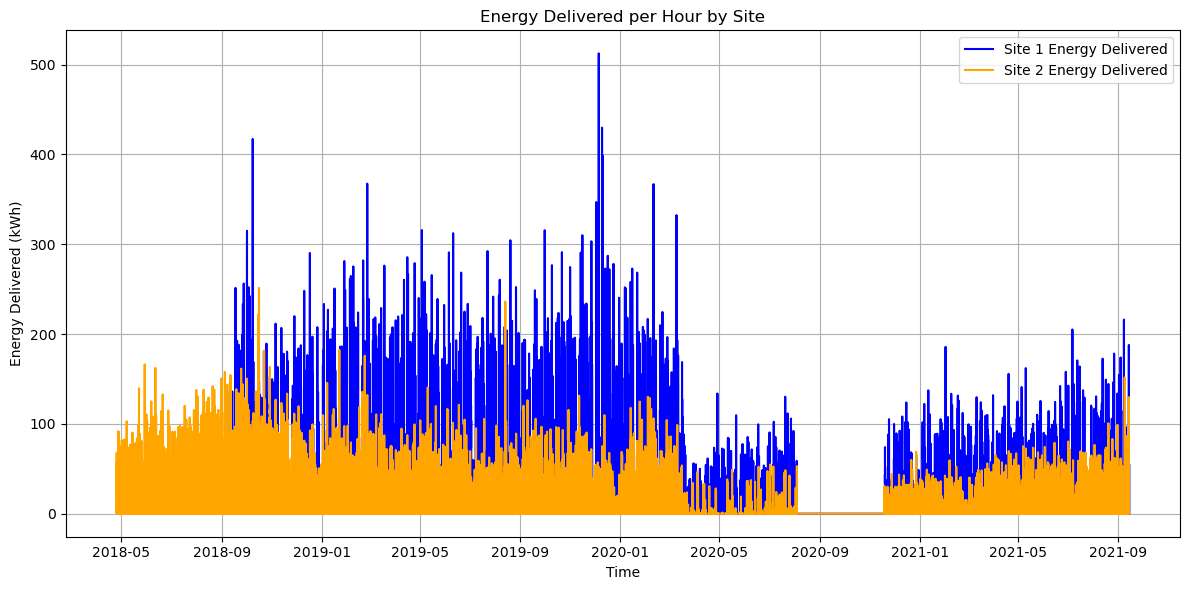

In [ ]:
energy_delivered_site1 = df_ev[df_ev['siteID'] == 1].resample('H', on='doneChargingTime')['kWhDelivered'].sum().reset_index()
energy_delivered_site2 = df_ev[df_ev['siteID'] == 2].resample('H', on='doneChargingTime')['kWhDelivered'].sum().reset_index()

# Plot Energy Delivered per Hour
plt.figure(figsize=(12, 6))
plt.plot(
    energy_delivered_site1['doneChargingTime'], 
    energy_delivered_site1['kWhDelivered'], 
    label='Site 1 Energy Delivered', 
    color='blue'
)
plt.plot(
    energy_delivered_site2['doneChargingTime'], 
    energy_delivered_site2['kWhDelivered'], 
    label='Site 2 Energy Delivered', 
    color='orange'
)
plt.title('Energy Delivered per Hour by Site')
plt.xlabel('Time')
plt.ylabel('Energy Delivered (kWh)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


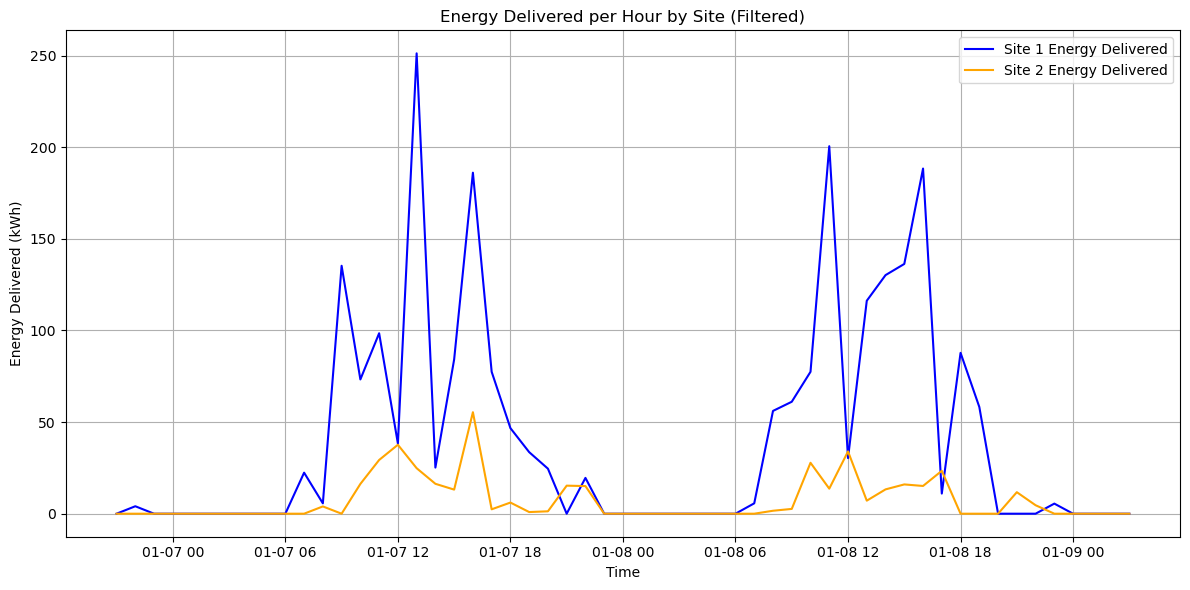

In [214]:
timezone = pytz.timezone('America/Los_Angeles')

filtered_start_time = datetime(2020, 1, 7, 6, 0).astimezone(timezone)
filtered_end_time = datetime(2020, 1, 9, 12, 0).astimezone(timezone)

energy_delivered_site1 = df_ev[df_ev['siteID'] == 1].resample('H', on='doneChargingTime')['kWhDelivered'].sum().reset_index()
energy_delivered_site2 = df_ev[df_ev['siteID'] == 2].resample('H', on='doneChargingTime')['kWhDelivered'].sum().reset_index()

# Filter by the selected timeframe
filtered_energy_site1 = energy_delivered_site1[
    (energy_delivered_site1['doneChargingTime'] >= filtered_start_time) & 
    (energy_delivered_site1['doneChargingTime'] <= filtered_end_time)
]
filtered_energy_site2 = energy_delivered_site2[
    (energy_delivered_site2['doneChargingTime'] >= filtered_start_time) & 
    (energy_delivered_site2['doneChargingTime'] <= filtered_end_time)
]

# Plot Energy Delivered per Hour with Filtering
plt.figure(figsize=(12, 6))
plt.plot(
    filtered_energy_site1['doneChargingTime'], 
    filtered_energy_site1['kWhDelivered'], 
    label='Site 1 Energy Delivered', 
    color='blue'
)
plt.plot(
    filtered_energy_site2['doneChargingTime'], 
    filtered_energy_site2['kWhDelivered'], 
    label='Site 2 Energy Delivered', 
    color='orange'
)

plt.title('Energy Delivered per Hour by Site (Filtered)')
plt.xlabel('Time')
plt.ylabel('Energy Delivered (kWh)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

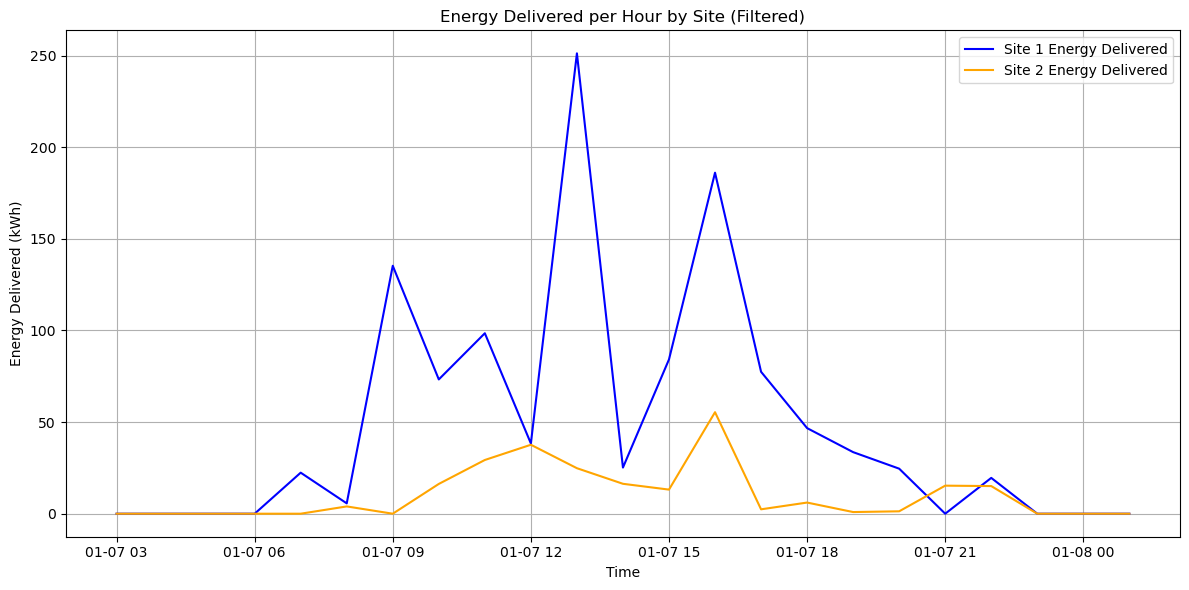

In [215]:
timezone = pytz.timezone('America/Los_Angeles')

filtered_start_time = datetime(2020, 1, 7, 12, 0).astimezone(timezone)
filtered_end_time = datetime(2020, 1, 8, 10, 0).astimezone(timezone)

energy_delivered_site1 = df_ev[df_ev['siteID'] == 1].resample('H', on='doneChargingTime')['kWhDelivered'].sum().reset_index()
energy_delivered_site2 = df_ev[df_ev['siteID'] == 2].resample('H', on='doneChargingTime')['kWhDelivered'].sum().reset_index()

# Filter by the selected timeframe
filtered_energy_site1 = energy_delivered_site1[
    (energy_delivered_site1['doneChargingTime'] >= filtered_start_time) & 
    (energy_delivered_site1['doneChargingTime'] <= filtered_end_time)
]
filtered_energy_site2 = energy_delivered_site2[
    (energy_delivered_site2['doneChargingTime'] >= filtered_start_time) & 
    (energy_delivered_site2['doneChargingTime'] <= filtered_end_time)
]

# Plot Energy Delivered per Hour with Filtering
plt.figure(figsize=(12, 6))
plt.plot(
    filtered_energy_site1['doneChargingTime'], 
    filtered_energy_site1['kWhDelivered'], 
    label='Site 1 Energy Delivered', 
    color='blue'
)
plt.plot(
    filtered_energy_site2['doneChargingTime'], 
    filtered_energy_site2['kWhDelivered'], 
    label='Site 2 Energy Delivered', 
    color='orange'
)

plt.title('Energy Delivered per Hour by Site (Filtered)')
plt.xlabel('Time')
plt.ylabel('Energy Delivered (kWh)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()